In [1]:
import numpy as np
import math 
import pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
import random

In [2]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH."""
        hh=0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
        return -1*(hh//2)
     

In [716]:
L_min=2
L_max=5
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]

In [717]:
one_over_lengths=0
lengths=range(L_min, L_max+1)

for i in lengths:
    one_over_lengths=one_over_lengths+1/i

k=1/one_over_lengths


probabilities = []
for i in lengths:
    #probabilities.append(1/len(lengths))
    probabilities.append(k/i)
    
print(probabilities)
print(sum(probabilities))

[0.38961038961038963, 0.25974025974025977, 0.19480519480519481, 0.15584415584415584]
1.0


In [676]:
st='HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHHHHPHPHPHPHH'
st ="PPHHHPHHHHHHHHPPPHHHHHHHHHHPHPPPHHHHHHHHHHHHPPPPHHHHHHPHHPHP"
st = "HPHPPHHPHPPHPHHPPHPH"
length = len(st)
sequence_example=[]
for c in st:
    if c=='H':
        sequence_example.append(1)
    else:
        sequence_example.append(0)
print(sequence_example)
print(len(sequence_example))

[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
20


In [672]:
T = 1.5 #температура фиксирована 
n_interations = 100 #пока фиксирую число итераций так 


In [696]:
start_conformation = [(0, 0)]
for i in range(1,length):
    if (i%8>0 and i%8<4):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]+1)
    elif (i%8>4 and i%8<=7):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]-1)
    else:
        new_coordinate = (start_conformation[-1][0]+1,start_conformation[-1][1])
    start_conformation.append(new_coordinate)
print(start_conformation)
print(len(start_conformation))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
20


In [731]:
sequence_example = [1, 0, 1, 0, 0, 1, 0,0,1,1]  
length=len(sequence_example)
start_conformation =[]
for i in range(len(sequence_example)):
    start_conformation.append((i, 0  )  )

In [732]:
xplot = []
yplot = []
for i in start_conformation:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)

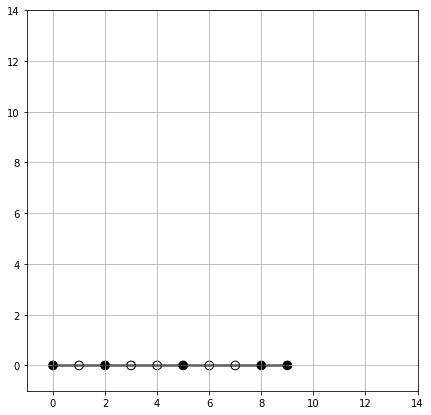

In [733]:
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=sequence_example, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

#plt.axis('off')

plt.grid(True)

это начальная конформация. 

In [653]:
p = Protein(sequence_example, start_conformation)
start_e = p.count_proteins_contacts()
print(start_e)

0


In [613]:
def D(point1, point2):
    "Это расстояние по норме р1."
    return abs(point2[0]-point1[0]) + abs(point2[1]-point1[1])

# Attempt to implement FRESS


In [680]:
#current_conf = start_conformation.copy()
#tobreak=False 

def regrowth_middle(start_conformation, sequence_example, l,  start_position ):
    
    current_conf = start_conformation.copy()
    print("l", l)
    print(start_position)
    #l=4
 
    #l = np.random.choice(lengths, 1, p=probabilities)[0] #длина фрагмента, который будет изменяться 

    #end = length-l
    
    #end = len(start_conformation) - l 
    
    #start_position = random.randint(0,end-1) #случайно выбранная позиция  для regrowth 
    
    
    #я тут мб поменяю чуть позже так, чтобы можно было проводить это и с конца, но пока так 
    
    
    p_old = Protein(sequence_example, start_conformation)
    E_old = p_old.count_proteins_contacts()
    
    
    
    #start_position=end-1

    end_position = start_position+l-1

    C_t= current_conf[:start_position]+current_conf[end_position+1:]

    Seq_t=sequence_example[:start_position]+sequence_example[end_position+1:]
    

    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    cummulative_exp = 0
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    first_moves_all = []  
    for step in steps:
        point = (C_t[start_position-1][0]+step[0], C_t[start_position-1][1]+step[1])
        
        if (point == current_conf[start_position]):
            first_moves_all.append(point)
            index = len(first_moves_all)-1
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-start_position)):
            first_moves.append(point)
            first_moves_all.append(point)
            #проверка на самопересечения и возможность из потенциальной точки достичь оборванную часть цепочки 
  
    print(first_moves)
    #print(first_moves_all)
    
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[:start_position]+[sequence_example[start_position]]+sequence_example[end_position+1:] 
        
        
        accept_first = []
        enews= []
        for first_move in first_moves:
            C_t_j = current_conf[:start_position]+[first_move]+current_conf[end_position+1:]
            
            pnew = Protein(Seq_t_j ,C_t_j)
            
            Enew = pnew.count_proteins_contacts()
            enews.append(Enew)
            acceptance = math.exp(-(Enew-E_t)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        

        toprob=sum(accept_first)
        #тут я попыталась рассчитать вероятности 

        for u in accept_first:
            accept_prob_first.append(u/toprob)
            
        print(accept_prob_first)    
        #for old conf 
        
        #C_t_j = current_conf[:start_position]+[first_moves_all[index]]+current_conf[end_position+1:]
        #pold = Protein(Seq_t_j ,C_t_j)
            
        #Eold = pnew.count_proteins_contacts()
        
        
  
         
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
        
        
        C_t_j[start_position] = first_moves_all[index]
        #print(len(C_t_j), "len" )
        pw = Protein(    Seq_t_j, C_t_j   )
        Ew = pw.count_proteins_contacts()
        accept_first.append(math.exp( -(Ew - E_t  )/T  ))
        toprob1 = sum(accept_first)
        ros_weight_new = toprob / toprob1 
  
        C_t=current_conf[:start_position]+[first_moves[p_t_j]]+current_conf[end_position+1:]
        Seq_t=Seq_t_j.copy()
        
        
        C_t_forold=current_conf[:start_position+1]+current_conf[end_position+1:]
        #print(len(C_t_forold), " old len first ")

            
        cummulative_exp = -Ew +enews[p_t_j]#I suppose it is the Rosenbluth weight for new conformation 

        
        

        for t in range(start_position+1, end_position+1):
            p_t = Protein(Seq_t_j, C_t)
            print(" t ", t)
            #print(" t old point ", start_conformation[t])
            E_t = p_t.count_proteins_contacts()
           
            moves = [] 
            moves_old = [] 
            p_t_old = Protein(Seq_t_j, C_t_forold)
            E_t_old = p_t_old.count_proteins_contacts()
            #print(C_t_forold[t-1], " ti1 point")
        # нужно просчитать старые шаги 
            for step in steps:
                point = (C_t[t-1][0]+step[0], C_t[t-1][1]+step[1])
                pointold = (C_t_forold[t-1][0]+step[0], C_t_forold[t-1][1]+step[1])
                
                if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-t)):
                    moves.append(point)
                    
                
                #print(pointold)
                #print(C_t_forold)
                if ((pointold not in C_t_forold )and D(pointold, current_conf[end_position+1])<=abs(end_position+1-t)):
                    #print("good")
                    moves_old.append(pointold)
                    #print("updated old moves ", moves_old)
                    
                    
            if(len(moves)==0):
                
                break 
                
            else: 
                Seq_t_j=sequence_example[:t]+[sequence_example[t]]+sequence_example[end_position+1:]
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                enews = []
                
                for move in moves:
                    C_t_j =  C_t[:t]+[move]+current_conf[end_position+1:]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    enews.append(Enew)
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                
                
                acceptance_old = []
                              
                enews1 = []
                #print(moves_old, " old")
                #print("t", t)
               
                print(moves)
                print(acceptance)
                for move in moves_old:
                    C_t_j =  current_conf[:t]+[move]+current_conf[end_position+1:]
                    
                        
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    if move==start_conformation[t]:
                        eoldt1=Enew
                        #print("of course ")
                    acceptance_old.append(math.exp(-(Enew-E_t_old)/T) )
                to_prob1 = sum(acceptance_old)
                ros_weight_new= ros_weight_new* to_prob1/to_prob
                
                
                
                
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                C_t=  C_t[:t]+[moves[p_t_j]]+current_conf[end_position+1:]
                C_t_forold = start_conformation[:t+1] + start_conformation[end_position+1:]
                
                
                cummulative_exp = cummulative_exp + E_t_old + enews[p_t_j]   - E_t - eoldt1
                
                #print(len(C_t_forold), "len  old " )
                
                #print(len(C_t), "len new ")
                
                
               # ros_weight_new=ros_weight_new/prob_acceptance[p_t_j]
               
          
                #Seq_t=Seq_t_j.copy()
                        
             
            
            
                
    if(len(C_t)==length):
        #print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        enew = math.exp(-(Enew-E_t+cummulative_exp)/T)
        #print("Final len", len(C_t))
        probability_metropolis = math.exp(( -(Enew - E_old) + cummulative_exp  )/T) *ros_weight_new
      #  print("probability", probability_metropolis)
       # print("E1 ", Enew,  "Eo", E_old)
        #пока любую новую конформацию принимаю с вероятностью 1 
        w = random.uniform(0, 1)
        if (w< min(1, probability_metropolis)):
            
        
        
           
            current_conf=C_t.copy()
            #print(" new ")
        return current_conf
        #return C_t_forold.copy()

    #continue    
     
        
    #return C_t_forold.copy()
    return start_conformation
    
    

        
    
    

In [503]:
q=0
for i in range(100):
    q = q+ random.randint(0, 1)
print(q)

51


In [740]:
#current_conf = regrowth_middle(start_conformation, sequence_example, 5, 16)
k = 0
currentconfs = [start_conformation]
min_e = start_e 
for i in range(100):
    
    print(i, end = " ")
    
    #print(l)
    l = np.random.choice(lengths, 1, p=probabilities)[0] #длина фрагмента, который будет изменяться 
#l = 5
    #q=  random.randint(0, 1)
    #if(q==0):
    
    
    #print("l= ", l)
    start_position = random.randint(0,length-l)
    
    
    #start_position = 0
    #print(" l", l)
   # else:
        #start_position = random.randint(l,length-1)
    #start_position=length-l
    #start_position=0
    if(start_position!=0 and start_position!= (length-l)):
        current_conf = regrowth_middle(start_conformation, sequence_example, l, start_position)
    elif(start_position==0):
      
        current_conf = regrowth_start(start_conformation, sequence_example, l)
    else: 
         
        current_conf =regrowth_end(start_conformation, sequence_example, l)
        
        
        
        
        
    if( start_conformation!=current_conf):
        k=k+1
        new_p = Protein(sequence_example, current_conf)
        new_e = new_p.count_proteins_contacts()
        if(new_e< min_e ):
            currentconfs=[]
            currentconfs.append(current_conf)
            min_e=new_e 
            print("we achieved ", min_e)  
            if(min_e==-9):
                print("perfect!")
                break
        elif(new_e ==min_e):
            currentconfs.append(current_conf)
        
        
        #print(k, i, end = " ")
        
    
    start_conformation=current_conf.copy()
    
print(k)



0 l 2
5
[(8, 3)]
[1.0]
 t  6
[(8, 4)]
[1.0]
we achieved  -1
1 l 4
3
[]
2 l =  2
[(5, 2), (6, 1)]
[1.0, 1.0]
t=  0
[(7, 1), (5, 1), (6, 0)]
[1.0, 1.0, 1.0]
3 l 2
7
[(7, 4)]
[1.0]
 t  8
[(7, 5)]
[1.0]
4 l 4
5
[(7, 4), (7, 2)]
[0.20860852732604496, 0.791391472673955]
 t  6
[(8, 4), (6, 4), (7, 5)]
[1.0, 1.0, 1.0]
 t  7
[(6, 5)]
[1.0]
 t  8
[(7, 5), (6, 6)]
[1.9477340410546757, 1.0]
5 l 2
7
[(8, 5)]
[1.0]
 t  8
[(7, 5), (8, 6)]
[1.0, 1.0]
6 l 2
4
[(6, 4)]
[1.0]
 t  5
[(7, 4)]
[1.0]
7 l 2
4
[(7, 3)]
[1.0]
 t  5
[(8, 3), (7, 4)]
[1.0, 1.0]
8 l 3
4
[(6, 4)]
[1.0]
 t  5
[(7, 4), (6, 5)]
[1.0, 1.0]
 t  6
[(7, 5)]
[1.0]
9 10 l 3
1
[(7, 2)]
[1.0]
 t  2
[(6, 2), (7, 3)]
[1.0, 1.0]
 t  3
[(6, 3)]
[1.0]
11 l =  5
[(5, 5), (6, 6)]
[1.0, 1.0]
t=  3
[(5, 6), (6, 7)]
[1.0, 1.0]
t=  2
[(4, 6), (5, 7), (5, 5)]
[1.0, 1.0, 1.9477340410546757]
t=  1
[(4, 5), (5, 4)]
[1.0, 1.0]
t=  0
[(3, 5), (4, 6), (4, 4)]
[1.0, 1.0, 1.0]
12 l 2
1
[(7, 2)]
[1.0]
 t  2
[(6, 2), (7, 3)]
[1.0, 1.0]
13 l 2
6
[(6, 6)]
[1.0]
 t  

In [741]:
print(min_e)
print(len(currentconfs))
print(currentconfs[0])

-3
1
[(7, 5), (7, 6), (6, 6), (6, 5), (6, 4), (7, 4), (7, 3), (8, 3), (8, 4), (8, 5)]


10


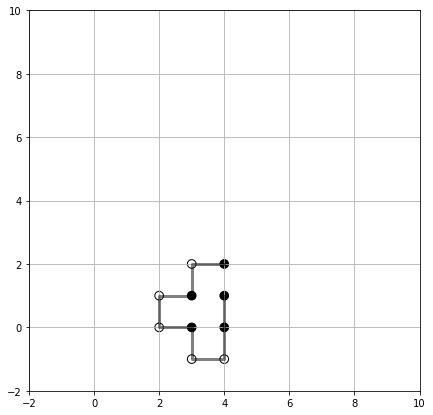

In [730]:
xplot = []
yplot = []
for i in currentconfs[0]:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)
print(len(current_conf))
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)
#plt.plot(first_moves[0][0], first_moves[0][1])
plt.scatter(xplot, yplot,c=sequence_example,  s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-2, 10)
plt.ylim(-2,10)

plt.grid(True)

In [701]:
def regrowth_start(start_conformation, sequence_example, l):
    
    print("l = ", l )
    current_conf = start_conformation.copy()
    #start_position = l 
    
    C_t= current_conf[l:]

    Seq_t=sequence_example[l:]
    

    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    Eold = E_t 
    
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    first_move_old = []
    
    
        
    for step in steps:
        point = (C_t[0][0]+step[0], C_t[0][1]+step[1])
        
        if (point == current_conf[l-1]):
            first_move_old.append(point)
            index = len(first_move_old)-1 
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t ) ):
            first_moves.append(point)
 
  
   # print(first_moves)
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        print(first_moves)
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[l-1:] 
        
        
        accept_first = []
    
    
        
        for first_move in first_moves:
            C_t_j = [first_move]+ current_conf[l:]
            #print(len(C_t_j), "ct ")
            #print(len(Seq_t_j), "seq ")
            pnew = Protein(Seq_t_j ,C_t_j)
            Enew = pnew.count_proteins_contacts()
            acceptance = math.exp(-(Enew-E_t)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        
        
        tobrob=sum(accept_first)
        print(accept_first)
        
        
        for u in accept_first:
            accept_prob_first.append(u/tobrob)
        
    
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
 
        C_t= [first_moves[p_t_j]]+current_conf[l:]
    #    print("len ct ", len(C_t))
        Seq_t=Seq_t_j.copy()

            
        ros_weight_new=1 / accept_prob_first[p_t_j]
        
        C_t_old = [first_move_old[index]] + current_conf[l:]
        p_t_old = Protein(Seq_t, C_t_old)
        enewold = p_t_old.count_proteins_contacts()
        accept_first.append(math.exp(-( enewold - E_t   )/T) )
        toprob1 = sum(accept_first)
        ros_weight_new = ros_weight_new*accept_first[-1]/toprob1
        
        for t in range(l-2, -1, -1): #
       #     print("t", t)
           
            moves = [] 
            moves_old = [] 
            for step in steps:
                point = (C_t[0][0]+step[0], C_t[0][1]+step[1])
                pointold =  (C_t_old[0][0]+step[0], C_t_old[0][1]+step[1])
                if ((point not in C_t )):
                    moves.append(point)
                if(pointold not in C_t_old):
                    moves_old.append(pointold)
                    
     #       print(moves)
            if(len(moves)==0):
                
                break 
                

                
                
            else: 
                print("t= ", t)
                print(moves)
                pq= Protein(Seq_t_j, C_t)
                E_t = pq.count_proteins_contacts()
                pold = Protein(Seq_t_j, C_t_old)
                E_t_old = pold.count_proteins_contacts()
                
                #C_t_old = current_conf[t-1:]
                Seq_t_j=sequence_example[t:]
                
               # print(len(C_t), "ct ")
               # print(len(Seq_t_j), "seq ")
                
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                for move in moves:
                    C_t_j = [ move ]+ C_t 
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    

                    
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                print(acceptance)
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                ros_weight_new = ros_weight_new / prob_acceptance[p_t_j]
                C_t=   [moves[p_t_j]]+C_t
                
 

                acceptance = [] 
                for move in moves_old:
                    C_t_j = [move]+ C_t_old 
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t_old)/T) )
                    if(move == current_conf[t]):
                        old_step = [move]
                        eq = acceptance[-1]
                    
                to_prob1 = sum(acceptance)
                
                ros_weight_new=ros_weight_new * eq/to_prob1
                
                C_t_old = old_step + C_t_old
                
                
                
                
                 #= current_conf[l-1:]
            #    print("ct after ", len(C_t))
               # ros_weight_new=ros_weight_new*prob_acceptance[p_t_j]
               


            
            
                
    if(len(C_t)==len(start_conformation)):
       # print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        probability_metropolis = math.exp(-(Enew-Eold)/T) *ros_weight_new 
       
        #пока любую новую конформацию принимаю с вероятностью 1 
        w = random.uniform(0, 1)
        #print("probability ", probability_metropolis)
        #print("E1 ", Enew, "E0 ", Eold)
        if (w< min(1, probability_metropolis)):
            
        #пока любую новую конформацию принимаю с вероятностью 1 
            current_conf=C_t.copy()
            
        return current_conf
    #continue    
        
    return start_conformation
    
    

In [532]:
def regrowth_end(start_conformation, sequence_example, l):
    
    current_conf = start_conformation.copy()
    #start_position = l 
    n = len(start_conformation)
    C_t= current_conf[:n-l]

    Seq_t=sequence_example[:n-l]
    

    p=Protein(Seq_t, C_t)
    E_told=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    first_moves_all = []
    
        
    for step in steps:
        point = (C_t[-1][0]+step[0], C_t[-1][1]+step[1])
        
        if (point == current_conf[n-l]):
            first_moves_all.append(point)
            index = len(first_moves_all)-1 
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t ) ):
            first_moves.append(point)
            first_moves_all.append(point)
 
  
   # print(first_moves)
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[:n-l+1] 
        
        
        accept_first = []
    
    
        
        for first_move in first_moves:
            C_t_j = C_t+ [first_move]
            #print(len(C_t_j), "ctj")
          #  print(len(Seq_t_j), "seq tj")
            pnew = Protein(Seq_t_j ,C_t_j)
            Enew = pnew.count_proteins_contacts()
            acceptance = math.exp(-(Enew-E_told)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        
        
        tobrob=sum(accept_first)
        
        
        
        for u in accept_first:
            accept_prob_first.append(u/tobrob)
        
    
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
        ros_weight_new = 1 / accept_prob_first[p_t_j]
 
        C_t=C_t + [first_moves[p_t_j]] 
        C_t_old = C_t.copy()
    
        C_t_old[-1] = first_moves_all[index]
      #  print("len ct ", len(C_t))
        Seq_t=Seq_t_j.copy()
        
        p1 = Protein(Seq_t_j, C_t_old)
        e1 = p1.count_proteins_contacts() #для старой конфигурации 
        #accept_prob_first=[]
        
        accept_first.append( math.exp(-( e1 - E_told  )/T))
        accept_prob_first=[]
        toprob1 = sum(accept_first)
        
        for u in accept_first:
            accept_prob_first.append(u/toprob1)
        
            
        
        
            
        ros_weight_new= ros_weight_new * accept_first[-1] /toprob1 
        
        
         
        
        for t in range(n-l+1, n): #
           # print("t", t)
           # print(len(C_t))
            p_t = Protein(Seq_t_j, C_t)
            E_t = p_t.count_proteins_contacts()
            
            p_t_old = Protein(Seq_t_j, C_t_old)
            E_t_old = p_t_old.count_proteins_contacts()
           
            moves = []
            moves_old =[] 
            for step in steps:
                point = (C_t[-1][0]+step[0], C_t[-1][1]+step[1])
                oldpoint = (C_t_old[-1][0]+step[0], C_t_old[-1][1]+step[1])
                if ((point not in C_t )):
                    moves.append(point)
                if( oldpoint not in C_t_old):
                    moves_old.append(oldpoint)
                    if(oldpoint == current_conf[t]):
                        index = len(moves_old)-1
                    
         #   print(moves)
            if(len(moves)==0):
                
                break 
                

                
                
            else: 
                Seq_t_j=sequence_example[:t+1]
                ind=[]
                
              #  print(len(C_t_j), "ctj")
              #  print(len(Seq_t_j), "seq tj")
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                for move in moves:
                    C_t_j =  C_t + [move]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                C_t=  C_t+ [moves[p_t_j]]
                
                ros_weight_new = ros_weight_new / prob_acceptance[p_t_j]

                
                acceptance=[]
                prob_acceptance = []
                for move in moves_old:
                    C_t_j =  C_t_old + [move]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t_old)/T) )
                to_prob1 = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob1)
                

                C_t_old = current_conf[:t+1]
                
                ros_weight_new=ros_weight_new*  prob_acceptance[index]
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                C_t_old = current_conf[:t+1]
            #    print("ct after ", len(C_t))
            #    ros_weight_new=ros_weight_new*prob_acceptance[p_t_j]
               


            
            
                
    if(len(C_t)==len(start_conformation)):
      #  print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        probability_metropolis = math.exp(-(Enew-E_told)/T) * ros_weight_new
        w = random.uniform(0, 1)
       # print("probability ", probability_metropolis)
      #  print("E1 ", Enew, "E0 ", E_told)
        if (w< min(1, probability_metropolis)):
            
        #пока любую новую конформацию принимаю с вероятностью 1 
            current_conf=C_t.copy()
        return current_conf

    #continue    
        
    return start_conformation
    
    

In [18]:
a = [1, 2, 3, 4]
print(a)
a= [0] + a
print(a)

[1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [19]:
q=random.uniform(0, 1)
print(q)

0.02213482926103527
